In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Read the data from the file and get an overview of this data ->

In [2]:
data = pd.read_csv('mnist_train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check whether the data has null values or not ->

In [111]:
data.isnull().sum().head(5)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
dtype: int64

Feature scaling and data pre-processing part ->

In [96]:
x = data.drop('label',axis=1).values
y = data['label'].values


# Scale the data values in between 0 to 1 by standard scaler so that our model will not prdict the values incorrectly->
scale = StandardScaler()
x = scale.fit_transform(x)

# Splitting the data into train and test set at the ratio of (75:25)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,shuffle = True)

C:\Users\Brogrammer_Vinay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Brogrammer_Vinay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Visualise the data ->

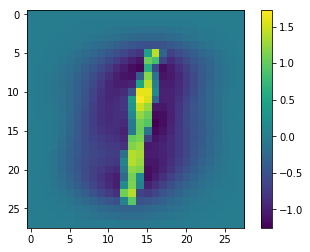

In [97]:
img = x_train[0].reshape(28,28)  

plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

Neural Networks starts from here-> 

In [98]:
x_train = x_train.reshape(len(x_train),28,28)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


Fit the training data into Neural Networks ->

In [99]:
model.fit(x_train,y_train,epochs=9)

Epoch 1/9
31500/31500 [==============================] - 2s 48us/sample - loss: 0.2863 - acc: 0.9182
Epoch 2/9
31500/31500 [==============================] - 1s 43us/sample - loss: 0.1191 - acc: 0.9656
Epoch 3/9
31500/31500 [==============================] - 2s 48us/sample - loss: 0.0769 - acc: 0.9771
Epoch 4/9
31500/31500 [==============================] - 1s 45us/sample - loss: 0.0555 - acc: 0.9837
Epoch 5/9
31500/31500 [==============================] - 1s 43us/sample - loss: 0.0421 - acc: 0.9872
Epoch 6/9
31500/31500 [==============================] - 1s 43us/sample - loss: 0.0335 - acc: 0.9907
Epoch 7/9
31500/31500 [==============================] - 1s 43us/sample - loss: 0.0268 - acc: 0.9919
Epoch 8/9
31500/31500 [==============================] - 1s 43us/sample - loss: 0.0213 - acc: 0.9941
Epoch 9/9
31500/31500 [==============================] - 1s 43us/sample - loss: 0.0203 - acc: 0.9947


Evaluate the testing data on the basis of training data ->

Accuracy -> 96%
LOSS -> 16%

In [100]:
x_test = x_test.reshape(len(x_test),28,28)

test_loss, test_acc = model.evaluate(x_test,y_test)
print(test_loss,' ',test_acc)

10500/10500 [==============================] - 0s 23us/sample - loss: 0.1628 - acc: 0.9664
0.16284955721344088   0.96638095


In [101]:
#Making the prediction to the test data-> 
predict = model.predict(x_test)

Predicting the values ->

In [ ]:
predict[0]

In [121]:
#Our predicting value is three lets check the real value ->
np.argmax(predict[2])

3

Checking teh real value and it is also 3 so our model is working very well ->

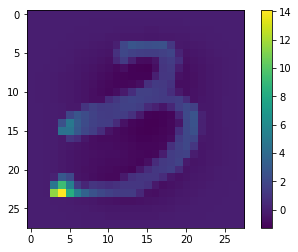

In [127]:
plt.figure()
plt.imshow(x_test[2])
plt.colorbar()
plt.grid(False)
plt.show()